In [1]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [4]:
df = pd.read_csv('user_app_data.csv')
df

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback
0,1,1.2,Android,109,11,France,1
1,2,1.3,Android,116,17,UK,2
2,3,1.0,Android,94,13,France,5
3,4,1.2,iOS,47,1,Canada,4
4,5,1.2,iOS,99,2,Canada,3
...,...,...,...,...,...,...,...
295,296,1.3,iOS,33,4,UK,1
296,297,1.1,Android,118,6,Germany,2
297,298,1.2,Android,65,1,Germany,5
298,299,1.0,iOS,146,5,France,5


In [6]:
#Identificar y abordar cualquier valor duplicado.
df[df.duplicated()]

,user_id,app_version,platform,session_duration,number_of_sessions,country,user_feedback


In [8]:
#Identificar y abordar cualquier dato que falte en este conjunto de datos. 
df.isna().sum()

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64

In [9]:
#Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
df.dtypes

user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object

In [13]:
#Identificar y abordar cualquier inconsistencia en los valores categóricos
print(pd.unique(df['platform']))
print(pd.unique(df['country']))

['Android' 'iOS']
['France' 'UK' 'Canada' 'Germany' 'Mexico' 'USA' 'Spain' 'Italy']


In [14]:
#Identificar y abordar cualquier punto de datos inapropiados o inusuales 
df.describe()

,user_id,app_version,session_duration,number_of_sessions,user_feedback
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,150.500000,1.155000,95.840000,9.596667,2.926667
std,86.746758,0.113363,51.922773,5.672853,1.449699
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,75.750000,1.100000,51.250000,5.000000,2.000000
50%,150.500000,1.200000,100.500000,9.000000,3.000000
75%,225.250000,1.300000,141.250000,15.000000,4.000000
max,300.000000,1.300000,179.000000,19.000000,5.000000


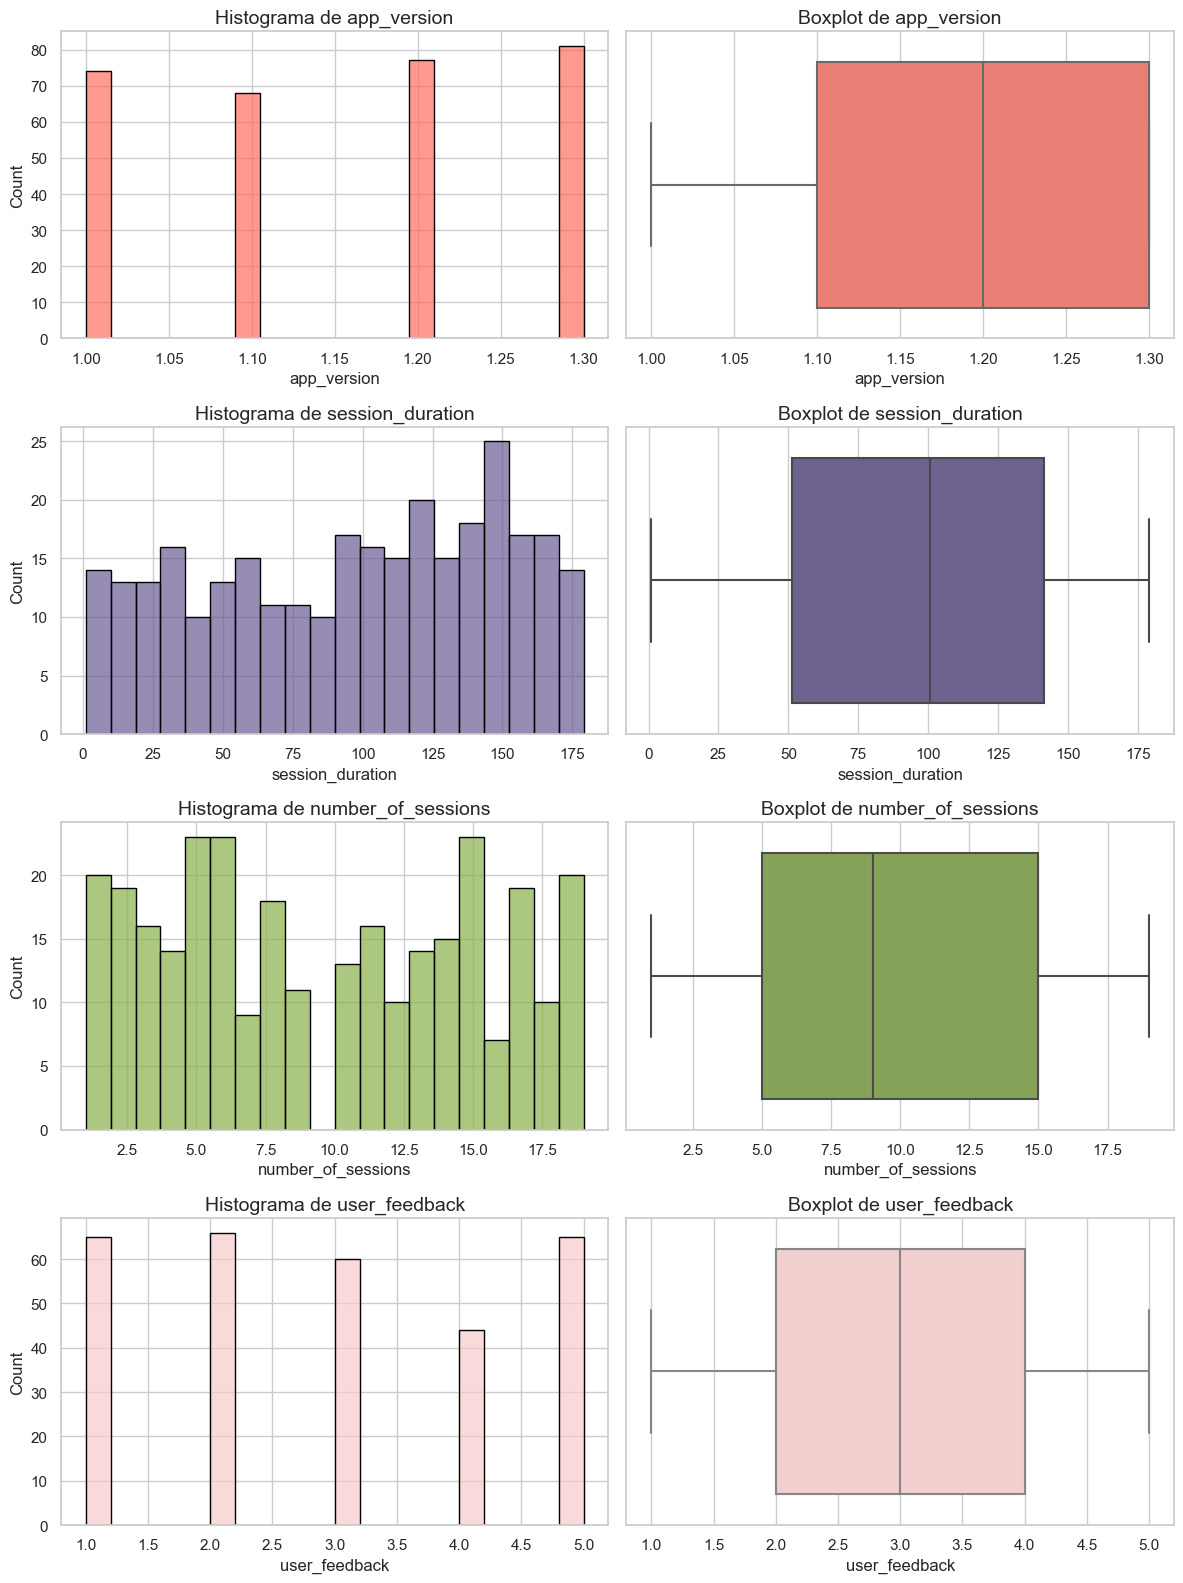

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Definir las variables
variables = ['app_version', 'session_duration', 'number_of_sessions', 'user_feedback']

# Definir una paleta de colores
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9']

# Crear una figura con subplots para cada variable
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

for i, var in enumerate(variables):
    # Histograma
    sns.histplot(df[var], bins=20, color=colors[i], edgecolor='black', alpha=0.7, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histograma de {var}', fontsize=14)
    
    # Boxplot
    sns.boxplot(x=df[var], color=colors[i], ax=axes[i, 1], fliersize=5, linewidth=1.5, whis=1.5)
    axes[i, 1].set_title(f'Boxplot de {var}', fontsize=14)

# Ajustar la separación entre los gráficos
plt.tight_layout()
plt.show()